In [33]:
#import packages
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn

In [34]:
#import the file
df = pd.read_csv('churn_raw_data.csv',dtype={'locationid':np.int64}) 
df.head(10) 

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5
5,6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,114.754111,979.612708,2,2,2,5,2,3,4,5
8,9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,118.366844,1312.874964,5,4,4,3,4,3,4,4
9,10,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,163.005280,508.763791,2,2,2,2,5,2,3,3


In [35]:
#Display columns and their data type. Identify redundant columns for analysis
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [36]:
#check the dataset for duplicates columns and rows
duplicates = df.duplicated()
print(duplicates)
df[duplicates]

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [37]:
#check and provide summary of missing values
missing_values = df.isna().sum()
print(missing_values)

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [38]:
#check and provide summary of null values
null_values = df.isnull().sum()
print(null_values)

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [39]:
#check for misspellings
df['Education'].unique()
df['Job'].unique()
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

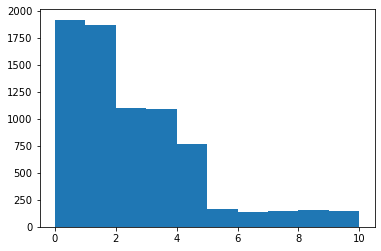

In [40]:
#create histograms to determine best method to deal with missing data.
plt.hist(df['Children'])
plt.show()

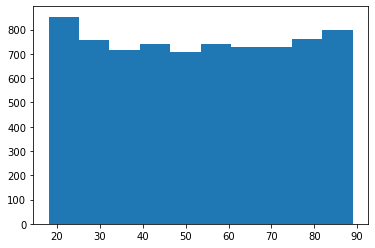

In [41]:
plt.hist(df['Age'])
plt.show()

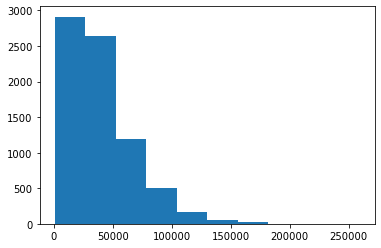

In [42]:
plt.hist(df['Income'])
plt.show()

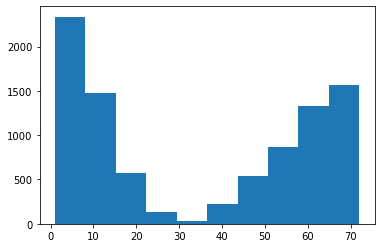

In [43]:
plt.hist(df['Tenure'])
plt.show()

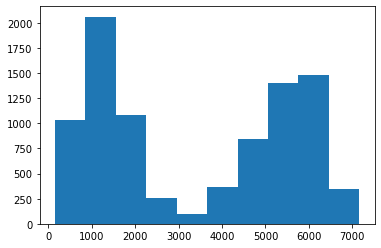

In [44]:
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

In [45]:
#Remove the first unnamed column
df_new = df.drop(df.columns[0],axis=1)
df_new.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [46]:
#rename columns to appropriate variable names
df_new.rename(columns = {'item1': 'Timely_Responses',
                            'item2': 'Timely_Fixes', 
                            'item3': 'Timely_Replacements', 
                            'item4':'Reliability',
                            'item5': 'Options',
                            'item6': 'Respectful_Response',
                            'item7':'Courteous_Exchange', 
                            'item8':'Active_Listening'}, inplace=True)
df_new.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [47]:
#replace missing values in Children column
df_new['Children'].fillna(df_new['Children'].median(), inplace = True)
df_new.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


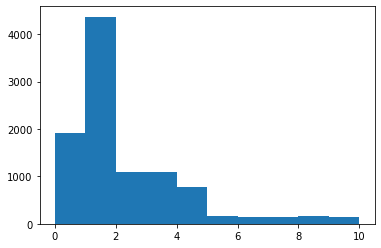

In [48]:
#create histogram of imputed Children column
plt.hist(df_new['Children'])
plt.show()

In [49]:
#impute Age column with median value
df_new['Age'].fillna(df_new['Age'].median(), inplace= True)

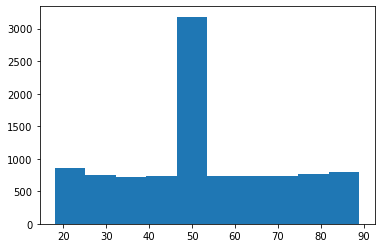

In [50]:
#create histogram of imputed Age column
plt.hist(df_new['Age'])
plt.show()

In [51]:
#impute Income variable with the median value
df_new['Income'].fillna(df_new['Income'].median(), inplace=True)

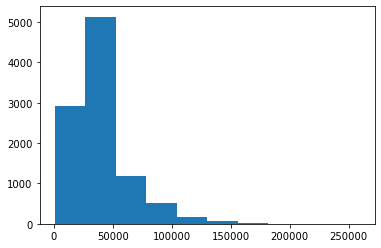

In [52]:
plt.hist(df_new['Income'])
plt.show()

In [53]:
#impute Tenure variable with the mean value
df_new['Tenure'].fillna(df_new['Tenure'].mean(), inplace=True)

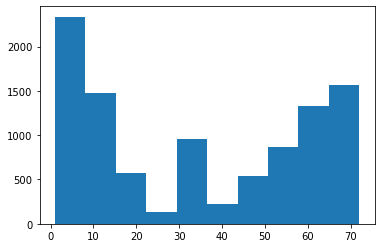

In [54]:
plt.hist(df_new['Tenure'])
plt.show()

In [55]:
df_new['Bandwidth_GB_Year'].fillna(df_new['Bandwidth_GB_Year'].mean(), inplace=True)

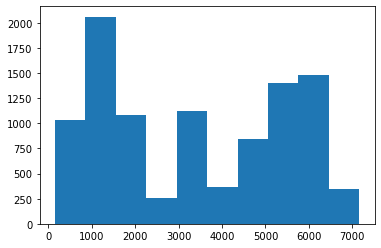

In [56]:
plt.hist(df_new['Bandwidth_GB_Year'])
plt.show()

In [57]:
#check outcome by summarizing missing and na values
df_new.isnull().sum()
df_new.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

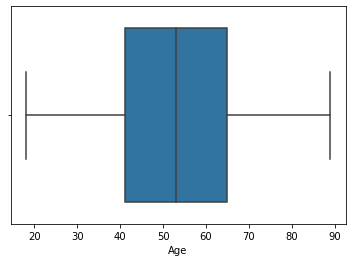

In [58]:
#use boxplots to check for outliers in Age, Income, Bandwidth_GB_Year and Monthly Charge
boxplot=seaborn.boxplot(x='Age',data=df_new)




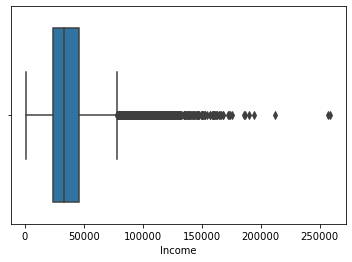

In [59]:
boxplot=seaborn.boxplot(x='Income',data=df_new)


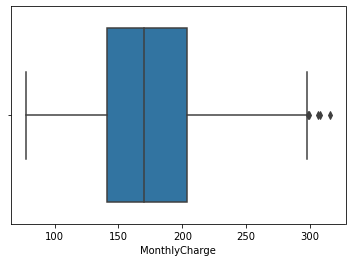

In [60]:
boxplot=seaborn.boxplot(x='MonthlyCharge',data=df_new)


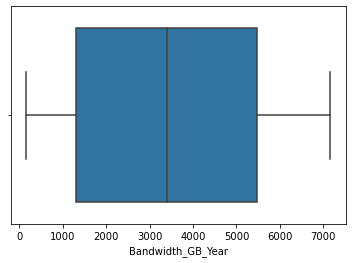

In [61]:
boxplot=seaborn.boxplot(x='Bandwidth_GB_Year',data=df_new)

In [ ]:
#extract cleaned dataset
df_new.to_csv('Churn_Clean.csv') 


In [62]:
df_new.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,1.822500,53.207500,38256.017897,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,1.925971,18.003457,24747.872761,7.025921,3.025898,...,43.335473,2072.712613,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,1.000000,41.000000,23660.790000,8.054362,10.000000,...,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3398.842752,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,65.000000,45504.192500,12.487644,14.000000,...,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000
